#### Dataset

In [2]:
# Salary_Data.csv, mtcars.csv
# https://mitu.co.in/dataset

#### Import the libaries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load the data

In [6]:
df = pd.read_csv('Salary_Data.csv')

In [7]:
df.shape

(30, 2)

In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Separate the input and output variables

In [11]:
# input data 
x = df[['YearsExperience']]   

# output data 
y = df['Salary'] 

In [12]:
x.shape

(30, 1)

In [13]:
type(x)

pandas.core.frame.DataFrame

In [14]:
type(y)

pandas.core.series.Series

#### Explore the data

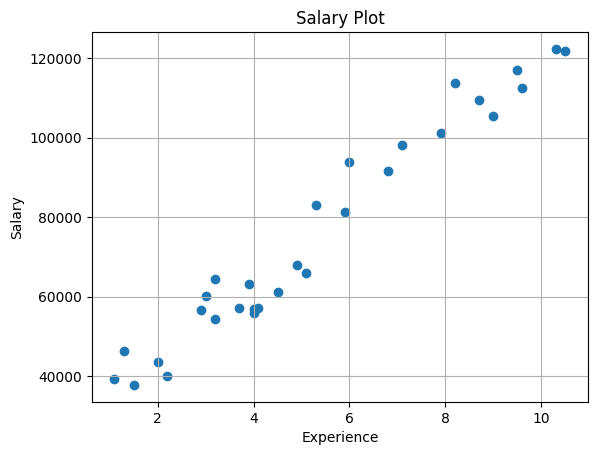

In [15]:
plt.title("Salary Plot")
plt.xlabel("Experience")
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y) 

In [18]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Cross Validation 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [22]:
x_train.shape

(22, 1)

In [23]:
x_test.shape

(8, 1)

In [24]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


#### Build the model

In [26]:
# import the class 
from sklearn.linear_model import LinearRegression

In [27]:
# create the object 
regressor = LinearRegression()

In [28]:
# train the model 
regressor.fit(x_train, y_train)

LinearRegression()

#### Regression Analysis

In [30]:
# Value of m 
regressor.coef_

array([9379.71049195])

In [31]:
# Value of c 
regressor.intercept_

26986.691316737248

In [33]:
new = 9379.71049195 * 12 + 26986.691316737248

In [34]:
new

139543.21722013725

In [35]:
new = 9379.71049195 * 15 + 26986.691316737248

In [36]:
new

167682.34869598722

In [37]:
regressor.predict([[12]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [38]:
# Predict the salary on unknown experiences 
y_pred = regressor.predict(x_test)

In [39]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [41]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [42]:
result

,actual,predicted
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


In [45]:
# Mean absolute error 
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
mean_absolute_error(y_pred, y_test)

3508.5455930660555

In [48]:
# Mean squared error 
np.mean((y_test - y_pred)**2)

22407940.143340684

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

22407940.143340684

In [50]:
# RMSE
np.sqrt(mean_squared_error(y_pred, y_test))

4733.70258289858

In [51]:
# R-Squared Error
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9750419839998418

In [52]:
pred = regressor.predict(x)

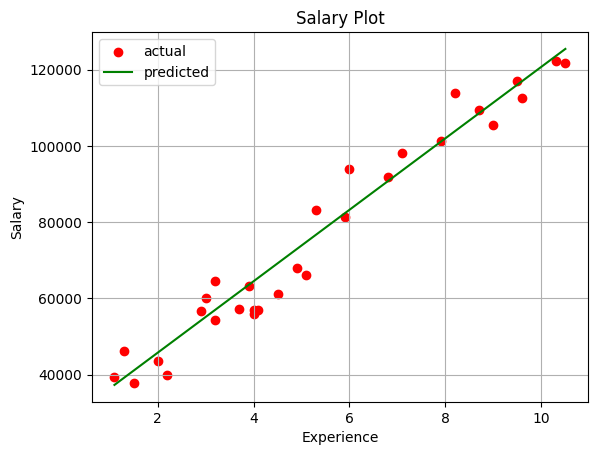

In [53]:
plt.title("Salary Plot")
plt.xlabel("Experience")
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y, color = 'red', label = 'actual') 
plt.plot(x, pred, color = 'green', label = 'predicted')
plt.legend()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

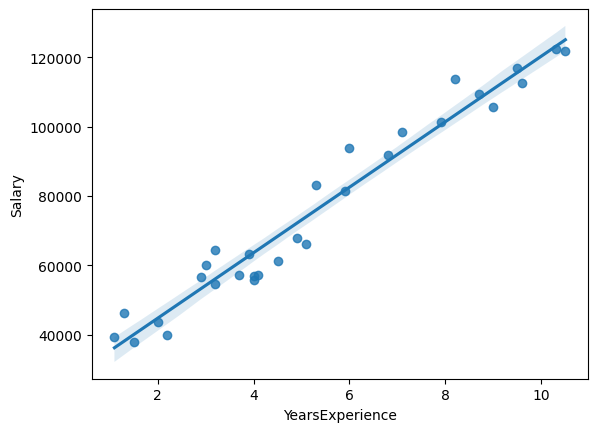

In [55]:
sns.regplot(x='YearsExperience', y='Salary', data = df)

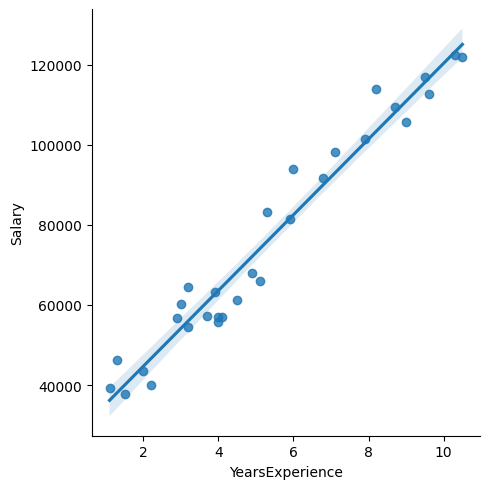

In [56]:
sns.lmplot(x='YearsExperience', y='Salary', data = df)